In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar10_root = '../cifar10'
ipc10 = np.loadtxt('./random_ipc_index/ipc_10.txt', dtype=int)
ipc10

array([ 6171, 22378, 26731, 32806,  2717, 46957, 14829, 28898, 17735,
       15196, 26572,  3712, 14524, 37341, 10794, 20957,  3674, 41346,
        1089, 17384,   181, 35928, 40153,  3103, 21806, 14282,  7853,
       10432, 24506, 30420, 10792,  9436, 41054, 16553, 47703,  3747,
        9551, 14162,  2196, 23813, 16827, 11834, 15097, 11426, 30988,
       46249, 22319,  8901, 29285, 47281, 10580, 11599,  3574, 40441,
       18769, 40812, 28652,  3250,  8520,  6413, 29500, 23523,    79,
       18492, 24022, 19411, 49403,  3881, 21197, 29940,  9828,  3520,
       34976, 33390, 38282, 38009, 46368, 40232, 41349, 30037, 35453,
        9623, 33614, 30574, 25639, 33895, 39908, 21606, 36600, 22047,
        9276, 14369, 35855,  9516,  4387, 42866, 34259, 24613, 20709,
       27217])

In [3]:
cifar10_train = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 4
train_data_loader = DataLoader(cifar10_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc10))
test_data_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

25

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar10_ipc10'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=10, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 25/25 [00:00<00:00, 64.68it/s, loss=2.41]


epoch: 1 done, loss: 0.0011958351824432611
Acc: 0.1734
[0.001]


Epoch 2: 100%|██████████| 25/25 [00:00<00:00, 142.45it/s, loss=2.1] 


epoch: 2 done, loss: 0.0010458355536684394
Acc: 0.2031
[0.001]


Epoch 3: 100%|██████████| 25/25 [00:00<00:00, 178.38it/s, loss=2.41]

epoch: 3 done, loss: 0.0009390418999828398


Acc: 0.216
[0.001]


Epoch 4: 100%|██████████| 25/25 [00:00<00:00, 190.51it/s, loss=1.93]

epoch: 4 done, loss: 0.0008548118639737368


Acc: 0.2387
[0.001]


Epoch 5: 100%|██████████| 25/25 [00:00<00:00, 198.98it/s, loss=1.43]

epoch: 5 done, loss: 0.0007585608982481062


Acc: 0.2356
[0.001]


Epoch 6: 100%|██████████| 25/25 [00:00<00:00, 234.61it/s, loss=1.52]

epoch: 6 done, loss: 0.0006798463291488588


Acc: 0.2431
[0.001]


Epoch 7: 100%|██████████| 25/25 [00:00<00:00, 207.19it/s, loss=0.935]

epoch: 7 done, loss: 0.000547264760825783


Acc: 0.2566
[0.001]


Epoch 8: 100%|██████████| 25/25 [00:00<00:00, 215.88it/s, loss=1.06] 

epoch: 8 done, loss: 0.0005084467702545226


Acc: 0.2444
[0.001]


Epoch 9: 100%|██████████| 25/25 [00:00<00:00, 207.62it/s, loss=1.06] 

epoch: 9 done, loss: 0.00045634826528839767


Acc: 0.2529
[0.001]


Epoch 10: 100%|██████████| 25/25 [00:00<00:00, 223.48it/s, loss=0.805]

epoch: 10 done, loss: 0.0003999896580353379


Acc: 0.247
[0.001]


Epoch 11: 100%|██████████| 25/25 [00:00<00:00, 184.30it/s, loss=1.47] 

epoch: 11 done, loss: 0.0003383025177754462


Acc: 0.2675
[0.0001]


Epoch 12: 100%|██████████| 25/25 [00:00<00:00, 188.21it/s, loss=0.357]

epoch: 12 done, loss: 0.00023531331680715084


Acc: 0.2704
[0.0001]


Epoch 13: 100%|██████████| 25/25 [00:00<00:00, 222.25it/s, loss=0.888]

epoch: 13 done, loss: 0.00023479505034629256


Acc: 0.2714
[0.0001]


Epoch 14: 100%|██████████| 25/25 [00:00<00:00, 204.26it/s, loss=0.129]

epoch: 14 done, loss: 0.00020173587836325169


Acc: 0.2708
[0.0001]


Epoch 15: 100%|██████████| 25/25 [00:00<00:00, 197.76it/s, loss=0.506]

epoch: 15 done, loss: 0.00018915673717856407


Acc: 0.2709
[1e-05]


Epoch 16: 100%|██████████| 25/25 [00:00<00:00, 211.46it/s, loss=0.252]

epoch: 16 done, loss: 0.00018558974261395633


Acc: 0.2706
[1e-05]


Epoch 17: 100%|██████████| 25/25 [00:00<00:00, 199.77it/s, loss=0.383]

epoch: 17 done, loss: 0.0001901136856758967


Acc: 0.2711
[1e-05]


Epoch 18: 100%|██████████| 25/25 [00:00<00:00, 216.92it/s, loss=0.271]

epoch: 18 done, loss: 0.00018237314361613244


Acc: 0.2708
[1e-05]


Epoch 19: 100%|██████████| 25/25 [00:00<00:00, 214.12it/s, loss=0.319]

epoch: 19 done, loss: 0.00018750510935205966


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 20: 100%|██████████| 25/25 [00:00<00:00, 230.19it/s, loss=0.348]

epoch: 20 done, loss: 0.0001937493507284671


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 21: 100%|██████████| 25/25 [00:00<00:00, 211.13it/s, loss=0.286]

epoch: 21 done, loss: 0.00018435514357406646


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 22: 100%|██████████| 25/25 [00:00<00:00, 208.81it/s, loss=0.285]

epoch: 22 done, loss: 0.00018037747940979898


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 23: 100%|██████████| 25/25 [00:00<00:00, 220.18it/s, loss=0.348]

epoch: 23 done, loss: 0.0001908790582092479


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 24: 100%|██████████| 25/25 [00:00<00:00, 210.22it/s, loss=0.299]

epoch: 24 done, loss: 0.0001907759578898549


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 25: 100%|██████████| 25/25 [00:00<00:00, 214.76it/s, loss=0.362]

epoch: 25 done, loss: 0.00019320087449159473


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 25/25 [00:00<00:00, 170.32it/s, loss=0.452]

epoch: 26 done, loss: 0.0001984292030101642


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 25/25 [00:00<00:00, 220.96it/s, loss=0.397]

epoch: 27 done, loss: 0.00017473605112172663


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 25/25 [00:00<00:00, 202.51it/s, loss=0.396]

epoch: 28 done, loss: 0.0001863888173829764


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 25/25 [00:00<00:00, 208.37it/s, loss=0.245]


epoch: 29 done, loss: 0.00017623639723751694
Acc: 0.2699
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 25/25 [00:00<00:00, 215.51it/s, loss=0.287]

epoch: 30 done, loss: 0.00020723081252072006


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 25/25 [00:00<00:00, 221.46it/s, loss=0.371]

epoch: 31 done, loss: 0.00018796262156683952


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 25/25 [00:00<00:00, 194.01it/s, loss=0.298]

epoch: 32 done, loss: 0.00018664408707991242


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 25/25 [00:00<00:00, 215.93it/s, loss=0.409]

epoch: 33 done, loss: 0.000186314937309362


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 25/25 [00:00<00:00, 174.43it/s, loss=0.43] 

epoch: 34 done, loss: 0.0001881475909613073


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 25/25 [00:00<00:00, 232.63it/s, loss=0.727]

epoch: 35 done, loss: 0.00019457301823422313


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 25/25 [00:00<00:00, 232.17it/s, loss=0.335]

epoch: 36 done, loss: 0.0001850440603448078


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 25/25 [00:00<00:00, 195.41it/s, loss=0.405]

epoch: 37 done, loss: 0.00018074462423101068


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 25/25 [00:00<00:00, 201.04it/s, loss=0.392]

epoch: 38 done, loss: 0.00020254732226021588


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 25/25 [00:00<00:00, 218.89it/s, loss=0.331]

epoch: 39 done, loss: 0.0001933115563588217


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 25/25 [00:00<00:00, 209.93it/s, loss=0.558]

epoch: 40 done, loss: 0.00020231344387866557


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 25/25 [00:00<00:00, 207.15it/s, loss=0.314]

epoch: 41 done, loss: 0.00018129248928744346


Acc: 0.2706
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 25/25 [00:00<00:00, 197.57it/s, loss=0.264]

epoch: 42 done, loss: 0.00017593508528079838


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 25/25 [00:00<00:00, 225.51it/s, loss=0.271]

epoch: 43 done, loss: 0.00017806761024985462


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 25/25 [00:00<00:00, 218.47it/s, loss=0.424]

epoch: 44 done, loss: 0.0001834848808357492


Acc: 0.2705
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 25/25 [00:00<00:00, 223.79it/s, loss=0.335]

epoch: 45 done, loss: 0.00019394431728869677


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 25/25 [00:00<00:00, 219.66it/s, loss=0.391]

epoch: 46 done, loss: 0.00019693134527187794


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 25/25 [00:00<00:00, 199.55it/s, loss=0.34] 

epoch: 47 done, loss: 0.00019245207658968866


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 25/25 [00:00<00:00, 201.18it/s, loss=0.28] 

epoch: 48 done, loss: 0.00018179042672272772


Acc: 0.2704
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 25/25 [00:00<00:00, 195.73it/s, loss=0.471]

epoch: 49 done, loss: 0.00018458993872627616


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 25/25 [00:00<00:00, 209.04it/s, loss=0.178]

epoch: 50 done, loss: 0.00016924501687753946


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 25/25 [00:00<00:00, 195.19it/s, loss=0.494]

epoch: 51 done, loss: 0.00018267713312525302


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 25/25 [00:00<00:00, 189.33it/s, loss=0.336]

epoch: 52 done, loss: 0.0001878697657957673


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 25/25 [00:00<00:00, 208.98it/s, loss=0.283]

epoch: 53 done, loss: 0.00018270612054038793


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 25/25 [00:00<00:00, 212.93it/s, loss=0.337]

epoch: 54 done, loss: 0.00018239859491586685


Acc: 0.2698
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 25/25 [00:00<00:00, 226.00it/s, loss=0.651]

epoch: 55 done, loss: 0.00018929195357486606


Acc: 0.27
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 25/25 [00:00<00:00, 210.74it/s, loss=0.438]

epoch: 56 done, loss: 0.00019086929387412965


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 25/25 [00:00<00:00, 215.21it/s, loss=0.336]

epoch: 57 done, loss: 0.00017723698692861944


Acc: 0.27
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 25/25 [00:00<00:00, 230.16it/s, loss=0.291]

epoch: 58 done, loss: 0.000170679108123295


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 25/25 [00:00<00:00, 204.81it/s, loss=0.333]

epoch: 59 done, loss: 0.00019631432951427996


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 25/25 [00:00<00:00, 213.71it/s, loss=0.272]

epoch: 60 done, loss: 0.00018131783872377127


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 25/25 [00:00<00:00, 180.61it/s, loss=0.29] 

epoch: 61 done, loss: 0.00018191183335147798


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 25/25 [00:00<00:00, 216.88it/s, loss=0.467]

epoch: 62 done, loss: 0.00018697715131565928


Acc: 0.2698
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 25/25 [00:00<00:00, 207.10it/s, loss=0.349]

epoch: 63 done, loss: 0.00017390646098647267


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 25/25 [00:00<00:00, 227.23it/s, loss=0.173]

epoch: 64 done, loss: 0.00019069945847149938


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 25/25 [00:00<00:00, 218.99it/s, loss=0.268]

epoch: 65 done, loss: 0.0001939564972417429


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 25/25 [00:00<00:00, 207.04it/s, loss=0.301]

epoch: 66 done, loss: 0.0002063089923467487


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 25/25 [00:00<00:00, 173.33it/s, loss=0.632]

epoch: 67 done, loss: 0.0001939341309480369


Acc: 0.2698
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 25/25 [00:00<00:00, 206.61it/s, loss=0.665]

epoch: 68 done, loss: 0.0001853002904681489


Acc: 0.2698
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 25/25 [00:00<00:00, 176.63it/s, loss=0.289]

epoch: 69 done, loss: 0.00018477592675480992


Acc: 0.27
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 25/25 [00:00<00:00, 210.27it/s, loss=0.365]

epoch: 70 done, loss: 0.0001925809629028663


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 25/25 [00:00<00:00, 206.40it/s, loss=0.301]

epoch: 71 done, loss: 0.00018214737065136433


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 25/25 [00:00<00:00, 199.69it/s, loss=0.402]

epoch: 72 done, loss: 0.00018699611246120185


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 25/25 [00:00<00:00, 213.26it/s, loss=0.272]

epoch: 73 done, loss: 0.00017609298811294138


Acc: 0.27
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 25/25 [00:00<00:00, 206.20it/s, loss=0.22] 

epoch: 74 done, loss: 0.00017646695778239518


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 25/25 [00:00<00:00, 211.09it/s, loss=0.247]

epoch: 75 done, loss: 0.00019767282356042415


Acc: 0.27
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 25/25 [00:00<00:00, 207.05it/s, loss=0.563]

epoch: 76 done, loss: 0.0001891930733108893


Acc: 0.27
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 25/25 [00:00<00:00, 208.87it/s, loss=0.204]

epoch: 77 done, loss: 0.00017502358241472393


Acc: 0.2699
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 25/25 [00:00<00:00, 179.03it/s, loss=0.527]

epoch: 78 done, loss: 0.0002006568684009835


Acc: 0.2698
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 25/25 [00:00<00:00, 203.62it/s, loss=0.325]

epoch: 79 done, loss: 0.0001900720235425979


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 25/25 [00:00<00:00, 200.28it/s, loss=0.339]

epoch: 80 done, loss: 0.00018694870232138783


Acc: 0.27
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 25/25 [00:00<00:00, 216.03it/s, loss=0.411]

epoch: 81 done, loss: 0.00017725469660945237


Acc: 0.27
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 25/25 [00:00<00:00, 175.12it/s, loss=0.346]

epoch: 82 done, loss: 0.00018872201326303184


Acc: 0.27
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 25/25 [00:00<00:00, 214.12it/s, loss=0.226]

epoch: 83 done, loss: 0.00018684653332456946


Acc: 0.27
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 25/25 [00:00<00:00, 205.67it/s, loss=0.454]

epoch: 84 done, loss: 0.00018957813153974712


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 25/25 [00:00<00:00, 221.00it/s, loss=0.35] 

epoch: 85 done, loss: 0.00019269390031695366


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 25/25 [00:00<00:00, 183.24it/s, loss=0.324]

epoch: 86 done, loss: 0.00018036052642855793


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 25/25 [00:00<00:00, 234.98it/s, loss=0.268]

epoch: 87 done, loss: 0.00017669594672042876


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 25/25 [00:00<00:00, 215.41it/s, loss=0.28] 

epoch: 88 done, loss: 0.0001770558301359415


Acc: 0.27
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 25/25 [00:00<00:00, 223.17it/s, loss=0.224]

epoch: 89 done, loss: 0.0001743267202982679


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 25/25 [00:00<00:00, 212.42it/s, loss=0.293]

epoch: 90 done, loss: 0.00018430306226946414


Acc: 0.27
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 25/25 [00:00<00:00, 168.39it/s, loss=0.262]

epoch: 91 done, loss: 0.0001604932767804712


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 25/25 [00:00<00:00, 206.35it/s, loss=0.502]

epoch: 92 done, loss: 0.0001841103076003492


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 25/25 [00:00<00:00, 210.67it/s, loss=0.334]

epoch: 93 done, loss: 0.00017168183694593608


Acc: 0.2701
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 25/25 [00:00<00:00, 212.67it/s, loss=0.278]

epoch: 94 done, loss: 0.00018060588627122343


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 25/25 [00:00<00:00, 210.07it/s, loss=0.616]

epoch: 95 done, loss: 0.00018740425002761185


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 25/25 [00:00<00:00, 206.70it/s, loss=0.474]

epoch: 96 done, loss: 0.0001835705479606986


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 25/25 [00:00<00:00, 212.39it/s, loss=0.404]

epoch: 97 done, loss: 0.00017844016838353127


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 25/25 [00:00<00:00, 192.58it/s, loss=0.274]

epoch: 98 done, loss: 0.00017191185906995088


Acc: 0.2703
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 25/25 [00:00<00:00, 188.16it/s, loss=0.41] 

epoch: 99 done, loss: 0.00018301213276572526


Acc: 0.2702
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 25/25 [00:00<00:00, 200.83it/s, loss=0.401]

epoch: 100 done, loss: 0.00017746402591001242


Acc: 0.2702
[1.0000000000000002e-06]
Time taken: 407.885473 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.2714, tensor(0.5516, device='cuda:0'))

<AxesSubplot: >

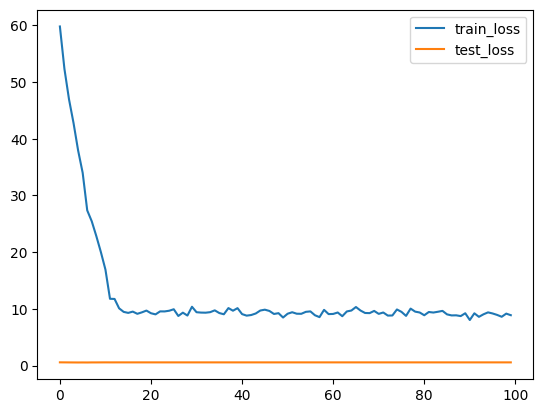

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])